In [1]:
import torch

In [115]:
class SLR(object):
    def __init__(self, itr = 1000, lr = 0.1):
        self.itr = 1000
        self.lr = 0.1
        self.W = torch.tensor(0.0, requires_grad=True)
        self.b = torch.tensor(0.0, requires_grad=True)

    def forward(self, X):
        return self.W * X + self.b

    def criterion(self, yHat, y):
        return torch.mean((yHat - y) ** 2) 

    def train(self, X, y):
        cost = []
        for i in range(0, self.itr):
            yHat = self.forward(X)
            loss = self.criterion(yHat, y)
            cost.append(loss.item())

            loss.backward()
            
            self.W.data = self.W.data - self.lr * self.W.grad.data
            self.b.data = self.b.data - self.lr * self.b.grad.data

            self.W.grad.data.zero_()
            self.b.grad.data.zero_()

        return cost
    
    def predict(self, X):
        return self.forward(X)



In [116]:
X = torch.arange(-3, 3, 0.1).view(-1,1)
y = torch.arange(-0.3, 0.3, 0.01).view(-1,1)



In [124]:
z = torch.rand(60) * 0.1
y = y + z.view(-1,1)

In [125]:
slr = SLR()
cost = slr.train(X, y)

In [126]:
cost

[0.03523031994700432,
 0.0077023752965033054,
 0.0027753158938139677,
 0.00164640077855438,
 0.0012467186897993088,
 0.001042335992679,
 0.0009196767932735384,
 0.0008424388943240047,
 0.0007931850850582123,
 0.0007616762304678559,
 0.0007415034342557192,
 0.000728585640899837,
 0.000720313168130815,
 0.0007150154560804367,
 0.000711622997187078,
 0.0007094503962434828,
 0.0007080590585246682,
 0.0007071679574437439,
 0.0007065973477438092,
 0.0007062319200485945,
 0.0007059978670440614,
 0.0007058480405248702,
 0.0007057519978843629,
 0.0007056906470097601,
 0.0007056513568386436,
 0.000705626152921468,
 0.0007056099129840732,
 0.0007055996102280915,
 0.0007055929163470864,
 0.0007055887253955007,
 0.0007055859314277768,
 0.0007055842434056103,
 0.0007055831956677139,
 0.0007055823807604611,
 0.0007055819733068347,
 0.0007055815658532083,
 0.0007055815076455474,
 0.0007055813912302256,
 0.0007055813912302256,
 0.0007055812748149037,
 0.0007055812748149037,
 0.0007055811583995819,
 0.0

In [127]:
import matplotlib.pyplot as plt

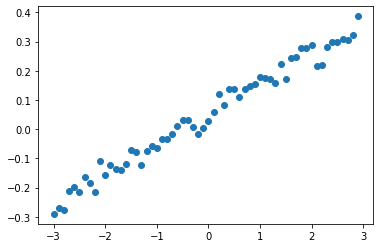

In [128]:
plt.scatter(X.numpy(), y.numpy())

In [129]:
yHat = slr.predict(X)

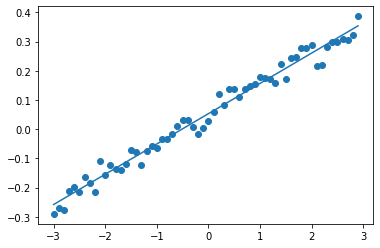

In [132]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), yHat.detach().numpy())

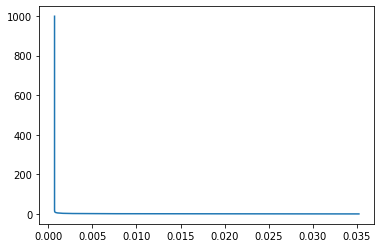

In [133]:
plt.plot(cost, range(0,1000))

In [183]:
class MLR(object):
    def __init__(self, itr = 1000, lr = 0.1):
        self.itr = 1000
        self.lr = 0.1

    def forward(self, X):
        return X @ self.W.view(-1,1) + self.b

    def criterion(self, yHat, y):
        return torch.mean((yHat - y) ** 2) 

    def train(self, X, y):
        self.W = torch.rand(X.size()[1], requires_grad=True)
        self.b = torch.tensor(0.0, requires_grad=True)
        cost = []
        for i in range(0, self.itr):
            yHat = self.forward(X)
            loss = self.criterion(yHat, y)
            cost.append(loss.item())

            loss.backward()
            
            self.W.data = self.W.data - self.lr * self.W.grad.data
            self.b.data = self.b.data - self.lr * self.b.grad.data

            self.W.grad.data.zero_()
            self.b.grad.data.zero_()

        return cost
    
    def predict(self, X):
        return self.forward(X)



In [200]:
X = torch.arange(-3, 3, 0.1).view(-1,2)
y = torch.arange(-0.3, 0.3, 0.02).view(-1,1)
z = torch.rand(30) * 0.1
y = y + z.view(-1,1)

In [201]:
X.size()

torch.Size([30, 2])

In [202]:
y.size()

torch.Size([30, 1])

In [203]:
mlr = MLR()
cost = mlr.train(X, y)

In [204]:
cost

[9.603569984436035,
 0.38492152094841003,
 0.01648947037756443,
 0.001661253860220313,
 0.0009984091157093644,
 0.0009269011789001524,
 0.0008952833013609052,
 0.0008756502065807581,
 0.0008631322998553514,
 0.0008551377686671913,
 0.0008500310941599309,
 0.0008467697189189494,
 0.0008446866995655,
 0.0008433561306446791,
 0.0008425062405876815,
 0.0008419635123573244,
 0.0008416167693212628,
 0.000841395347379148,
 0.0008412536117248237,
 0.0008411633898504078,
 0.0008411056478507817,
 0.0008410689770244062,
 0.0008410453447140753,
 0.0008410305017605424,
 0.0008410206064581871,
 0.0008410144946537912,
 0.0008410107111558318,
 0.0008410082664340734,
 0.0008410066366195679,
 0.0008410055306740105,
 0.0008410049485974014,
 0.0008410044829361141,
 0.0008410041918978095,
 0.0008410040172748268,
 0.000841003842651844,
 0.0008410039008595049,
 0.0008410036680288613,
 0.0008410034934058785,
 0.0008410036098212004,
 0.0008410040754824877,
 0.0008410037844441831,
 0.000841003842651844,
 0.0008

In [205]:
yHat = mlr.predict(X)

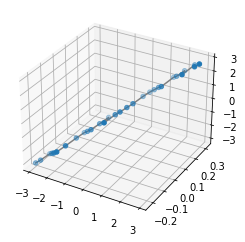

In [206]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = X[:,0]
xline = X[:,1]
yline = y
ax.plot3D(xline.numpy(), y.numpy(), zline.numpy(), 'gray')
ax.scatter3D(xline.numpy(), yline.numpy(), zline.numpy(), 'gray')

# # Data for three-dimensional scattered points
# zdata = 15 * np.random.random(100)
# xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
# ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [207]:
mlr.W.size()

torch.Size([2])

In [209]:
X @ mlr.W.view(-1,1)

tensor([[-0.2829],
        [-0.2633],
        [-0.2438],
        [-0.2243],
        [-0.2048],
        [-0.1853],
        [-0.1657],
        [-0.1462],
        [-0.1267],
        [-0.1072],
        [-0.0876],
        [-0.0681],
        [-0.0486],
        [-0.0291],
        [-0.0096],
        [ 0.0100],
        [ 0.0295],
        [ 0.0490],
        [ 0.0685],
        [ 0.0880],
        [ 0.1076],
        [ 0.1271],
        [ 0.1466],
        [ 0.1661],
        [ 0.1856],
        [ 0.2052],
        [ 0.2247],
        [ 0.2442],
        [ 0.2637],
        [ 0.2833]], grad_fn=<MmBackward0>)

In [210]:
yHat

tensor([[-0.2368],
        [-0.2173],
        [-0.1978],
        [-0.1783],
        [-0.1587],
        [-0.1392],
        [-0.1197],
        [-0.1002],
        [-0.0806],
        [-0.0611],
        [-0.0416],
        [-0.0221],
        [-0.0026],
        [ 0.0170],
        [ 0.0365],
        [ 0.0560],
        [ 0.0755],
        [ 0.0950],
        [ 0.1146],
        [ 0.1341],
        [ 0.1536],
        [ 0.1731],
        [ 0.1926],
        [ 0.2122],
        [ 0.2317],
        [ 0.2512],
        [ 0.2707],
        [ 0.2903],
        [ 0.3098],
        [ 0.3293]], grad_fn=<AddBackward0>)

In [179]:
x = torch.tensor([[1,1],[2,2]])
w = torch.tensor([1,2])

In [182]:
x @ w.view(-1,1)

tensor([[3],
        [6]])